<a href="https://colab.research.google.com/github/AbhimanyuAryan/PyTorch_NeuralNetworks/blob/master/Linear_Regression_Pytorch_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
Done.


In [0]:
%matplotlib inline
from fastai.basics import *

# Linear Regression Problem

In [0]:
n = 100

In [5]:
x = torch.ones(n,2); x
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.1691,  1.0000],
        [ 0.6361,  1.0000],
        [-0.3929,  1.0000],
        [ 0.2919,  1.0000],
        [-0.0899,  1.0000]])

In [6]:
a = tensor(3., 2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

In [8]:
y

tensor([ 2.1905e+00,  4.1407e+00,  1.0647e+00,  2.9579e+00,  2.6844e+00,
         2.8038e+00,  4.0912e+00,  3.9127e+00,  2.1922e+00,  2.0438e+00,
         3.5995e-01, -8.4623e-02,  9.9827e-01,  5.2591e+00,  5.0736e+00,
         2.1406e+00,  5.4257e+00,  2.9939e+00,  2.3264e+00,  4.5034e+00,
         4.3820e+00,  4.1508e+00,  3.6697e+00,  2.3270e-01,  3.2992e+00,
         3.8858e+00,  5.1034e-01,  1.9227e-01,  3.7701e+00,  2.3171e-01,
         1.4921e+00,  4.3032e+00,  2.6072e-03,  3.0259e+00,  1.0315e+00,
        -1.9617e-01, -3.5517e-01,  4.8906e-01,  1.0653e+00,  4.5749e+00,
         7.0241e-01,  9.6893e-01,  4.6330e+00, -3.3648e-01,  1.0508e+00,
         1.2310e+00,  5.1423e+00,  2.2475e+00,  5.1117e+00,  5.3042e+00,
        -5.7900e-01,  1.2422e+00,  4.6272e+00, -6.4069e-01,  1.9364e+00,
         1.9975e+00,  4.2773e+00,  4.4061e+00,  4.9560e+00,  3.8473e+00,
         4.8307e-01,  2.7716e+00,  3.6566e+00, -9.1364e-01,  3.8934e+00,
         3.6598e+00,  3.9619e+00,  5.1621e+00,  4.2

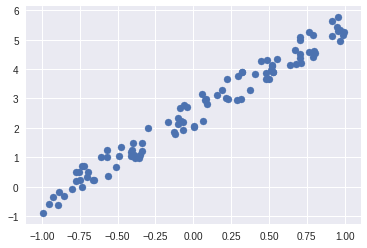

In [9]:
plt.scatter(x[:,0], y)

In [0]:
# Loss function
# y_hat: prediction that is made
# y: actual value
def mse(y_hat, y):
  return ((y_hat - y)** 2).mean()

In [21]:
a = tensor(-1., 1); a

tensor([-1.,  1.])

In [22]:
y_hat = x@a
mse(y_hat, y)

tensor(8.4409)

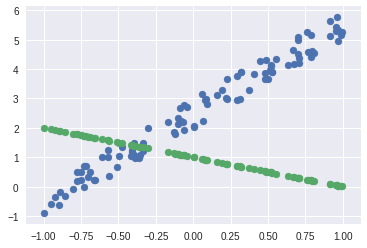

In [25]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)

# Gradient

In [29]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
  y_hat = x@a
  loss = mse(y, y_hat)
  if t % 10 == 0: print(loss)
  loss.backward()
  with torch.no_grad():
      a.sub_(lr * a.grad)
      a.grad.zero_()
  

In [31]:
lr = 1e-1
for t in range(100): update()

tensor(8.4409, grad_fn=<MeanBackward1>)
tensor(1.3766, grad_fn=<MeanBackward1>)
tensor(0.3906, grad_fn=<MeanBackward1>)
tensor(0.1619, grad_fn=<MeanBackward1>)
tensor(0.1071, grad_fn=<MeanBackward1>)
tensor(0.0940, grad_fn=<MeanBackward1>)
tensor(0.0908, grad_fn=<MeanBackward1>)
tensor(0.0901, grad_fn=<MeanBackward1>)
tensor(0.0899, grad_fn=<MeanBackward1>)
tensor(0.0899, grad_fn=<MeanBackward1>)


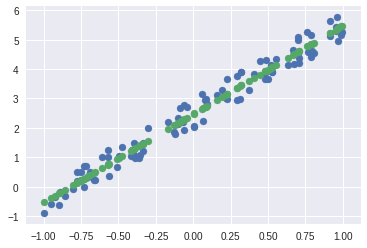

In [32]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a)

# Animate it!


In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [35]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)